Travelling salesman problem

TSP es *casi* (multi-depot) VRPTW pero:
- Solo 1 camion
- Todos los ciudades (aka. almacenes pequeños) tienen al menos 1 pedido
- Capacidad infinita
- Sin ventanas de tiempo (aka. plazos de entrega)
- Solo 1 deposito

Cambios identificados, necesarios para adaptar el TSP a nuestro caso:
- Tramos no conectados -> distancia grande entre ellos
- Distancias no son euclidianas, usar "geodistance"
- [...]

Refs:

- [scikit-opt](https://github.com/guofei9987/scikit-opt)

Differential Evolution scikit-opt example

In [11]:
'''
min f(x1, x2, x3) = x1^2 + x2^2 + x3^2
s.t.
    x1*x2 >= 1
    x1*x2 <= 5
    x2 + x3 = 1
    0 <= x1, x2, x3 <= 5
'''


def obj_func(p):
    x1, x2, x3 = p
    return x1 ** 2 + x2 ** 2 + x3 ** 2


constraint_eq = [
    lambda x: 1 - x[1] - x[2]
]

# r(x1, x2, x3) >= 0
constraint_ueq = [
    lambda x: 1 - x[0] * x[1],
    lambda x: x[0] * x[1] - 5
]

In [3]:
from sko.DE import DE

de = DE(func=obj_func, n_dim=3, size_pop=50, max_iter=800, lb=[0, 0, 0], ub=[5, 5, 5],
        constraint_eq=constraint_eq, constraint_ueq=constraint_ueq)

best_x, best_y = de.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [1.01075314 0.99002837 0.00997163] 
 best_y: [2.00187751]


Genetic Algorithm

In [12]:
import numpy as np


def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    '''
    x1, x2 = p
    part1 = np.square(x1) - np.square(x2)
    part2 = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(part1)) - 0.5) / np.square(1 + 0.001 * part2)

In [31]:
from sko.GA import GA

ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [-2.08616263e-07 -8.94069698e-08] 
 best_y: [0.]


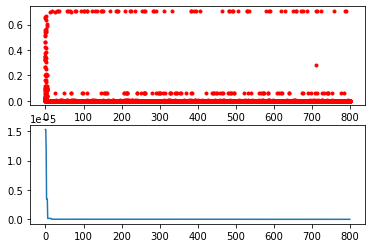

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# col: individuos,  row: iterations
Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

TSP

"geodistance" (using longitude, latitude): https://stackoverflow.com/questions/31632190/measuring-geographic-distance-with-scipy

In [166]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 5

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


In [182]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

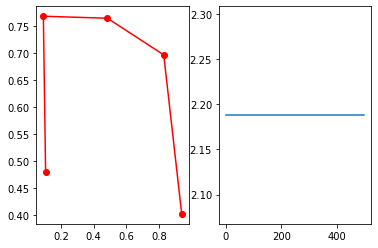

In [183]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points])
# "path"
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()

In [180]:
from sko.ACA import ACA_TSP

aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
              size_pop=50, max_iter=200,
              distance_matrix=distance_matrix)

best_x, best_y = aca.run()

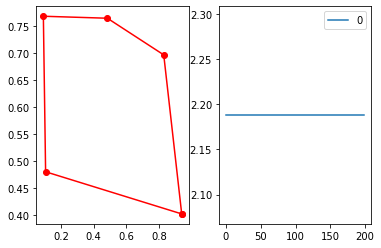

In [181]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
plt.show()